# A Network Tour of Data Science, EPFL 2016
# Project: Facial Emotion Recognition
students: Patryk Oleniuk, Carmen Galotta



In [1]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import csv
import scipy.misc

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 20.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#Data Visualization
# Load the shortened raw CSV data, it contains only 300 pictures with labels
emotions_dataset_dir = 'fer2013_shortened.csv'

# Load the data from *.csv file
The format od the csv line is<br>
class{0,1,2,3,4,5,6},pix0 pix2304,DataUsage(not used)<br>
e.g.<br>
2,234 1 34 23 ..... 234 256 0,Training<br>
The picture is always 48x48 pixels, 0-255 greyscale.

In [3]:
#Load the file in csv
ifile  = open(emotions_dataset_dir, "rt")
reader = csv.reader(ifile)

#preparing labels(Y) and images(X) data vectors
rownum = 0
num_data = 300; #TODO how to obtain number of rows
emotions = np.zeros(num_data)
images = np.zeros((num_data,48,48))


#parsing each row
for row in reader:
    #(column0) extract the emotion label
    emotions[rownum] = row[0]
    #(column1) extract the image data, parse it and convert into 48x48 array of integers
    images[rownum] = np.asarray([int(s) for s in row[1].split(' ')]).reshape(48,48)
    #row[2] (column2) is ignored
    rownum += 1
ifile.close()

# Explore the data
Plot some random pictures from each class.

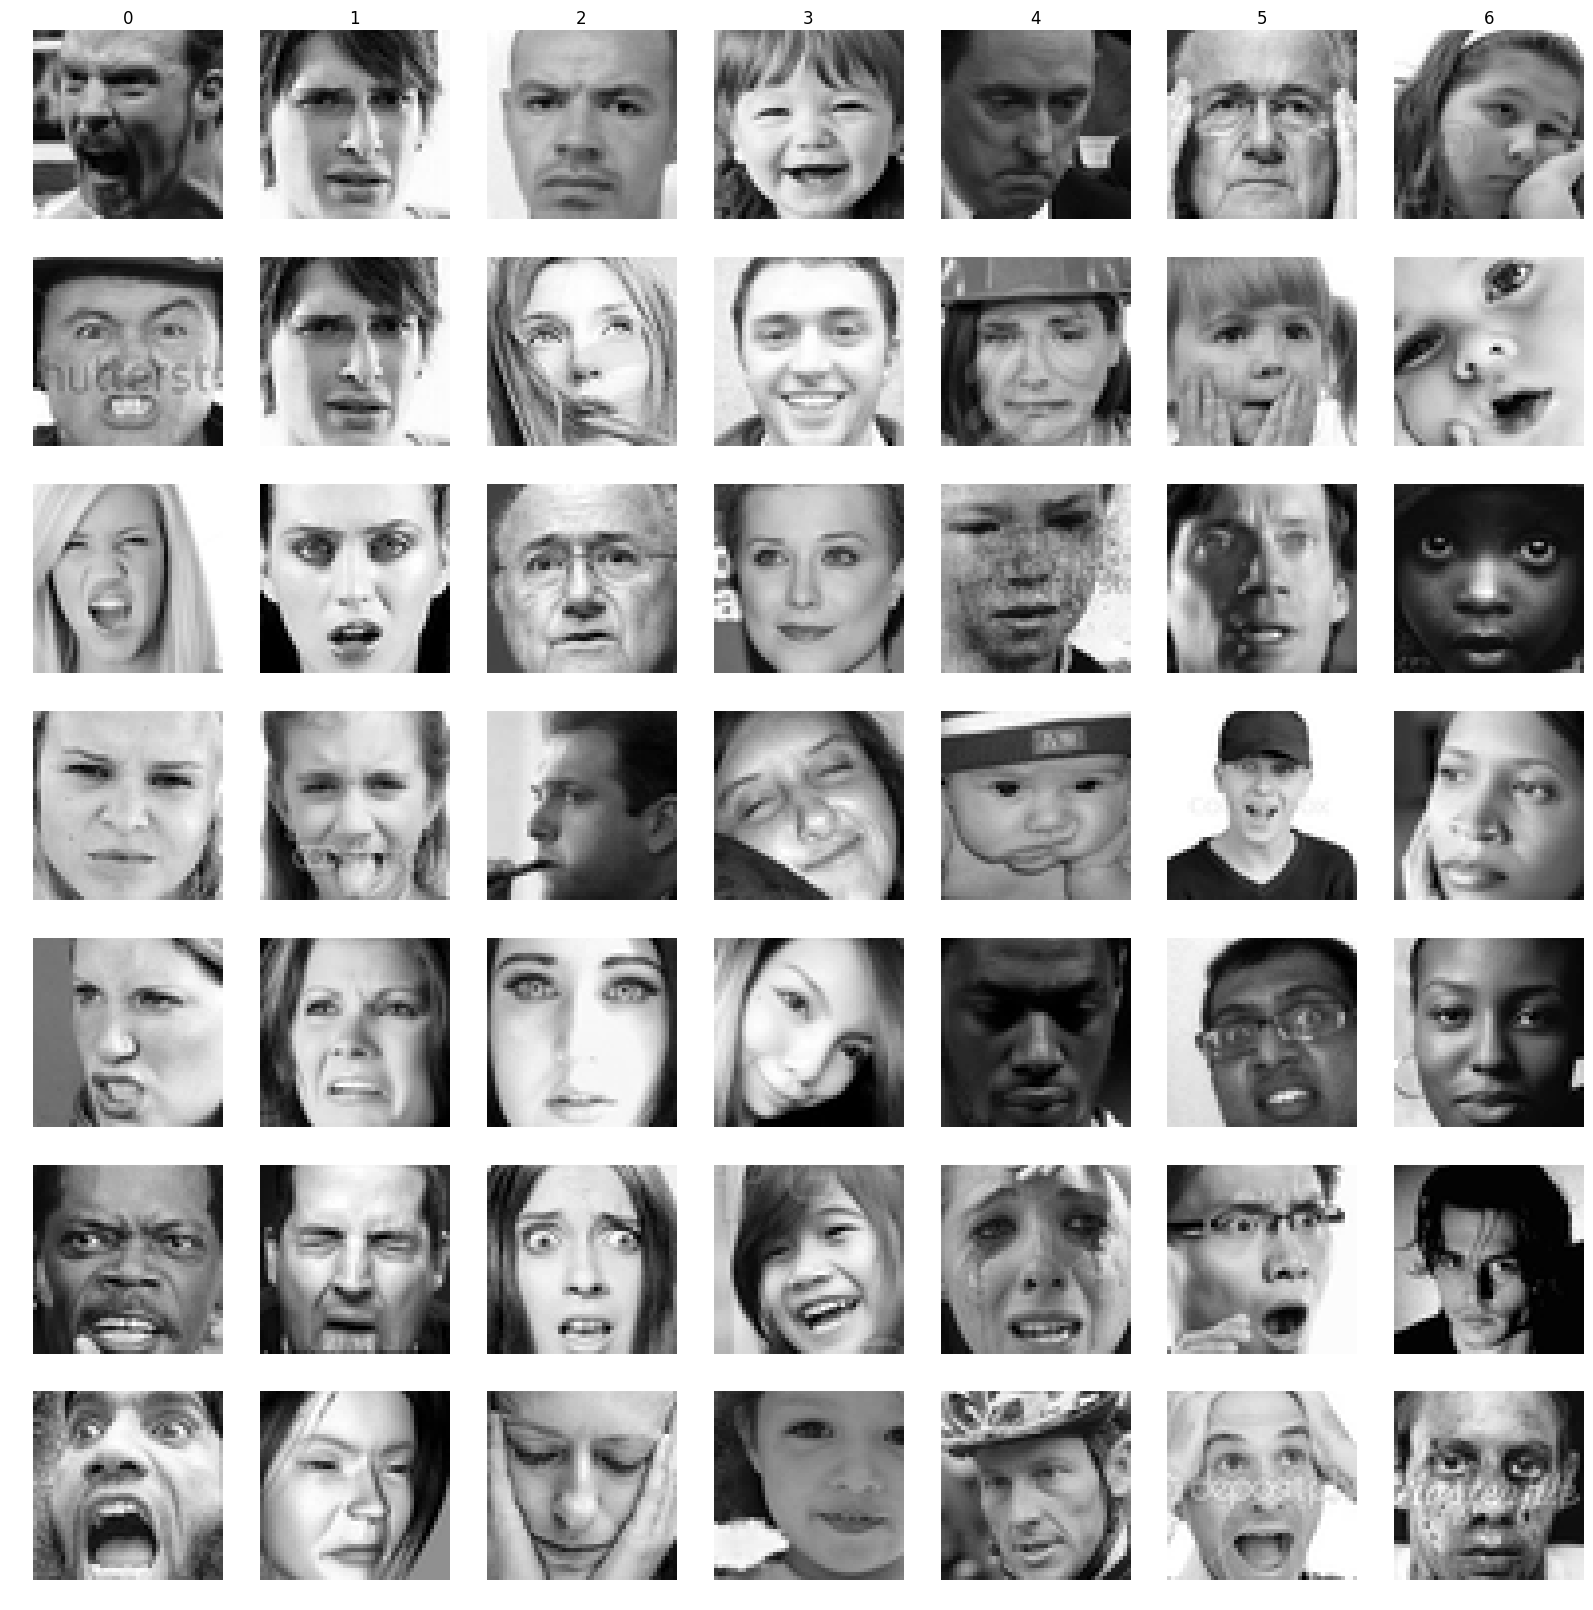

In [4]:
classes = [0,1,2,3,4,5,6 ]
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(emotions == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(images[idx])
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()